In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
from util import to_corr_matrix

In [4]:
df = pd.read_csv("data/train_hw03.csv")
df

,id,age,sex,y,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,18.4148,male,autism,-0.458933,-0.471744,-0.461779,-0.305860,0.047765,0.356486,...,-1.996018,-1.275805,-0.371995,-0.863312,-2.453302,-2.897479,-0.681213,2.771550,4.376339,2.915170
1,7,13.5800,male,autism,-44.830406,431.883087,898.798157,926.675476,467.511444,-105.597237,...,858.979919,3550.427979,7169.964844,9281.972656,8176.752930,4087.208008,-844.500122,-4014.025635,-4296.233887,-2987.512695
2,10,18.4175,male,autism,-0.536675,-0.692978,-0.494424,0.052672,0.580352,0.634929,...,-2.918994,-0.305058,0.293893,-1.441216,-2.808750,-1.520393,1.636729,4.163283,5.010502,5.159610
3,12,17.1000,male,control,-0.356160,-0.612644,-0.175026,0.923642,2.219596,3.136657,...,-3.818442,6.657434,13.913865,11.425905,2.044530,-5.044302,-4.298348,1.248278,5.167187,5.212446
4,13,17.7800,male,control,0.532626,0.372084,0.096217,-0.236015,-0.548263,-0.364282,...,-2.548552,-2.195497,0.857750,1.657618,0.908618,1.275948,1.349784,-0.099559,-1.511268,-1.784074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,794,11.0800,male,autism,1.605719,2.087463,1.628545,0.725985,0.269245,0.587729,...,-0.119474,1.007243,1.920006,1.698236,0.360375,-1.024146,-1.301874,-0.337484,0.892852,1.302862
596,795,30.0000,male,control,0.087450,1.267322,0.487800,-0.937467,-0.388316,0.680387,...,-0.060937,-2.922512,-2.003564,3.152400,4.499738,-1.591714,-6.111772,-1.400208,6.071485,6.663968
597,796,11.2000,male,control,0.004827,-0.561140,-1.022752,-1.409737,-1.673823,-1.672471,...,-5.140858,-3.528592,-3.022926,-2.655292,-0.777803,2.447924,4.820030,4.295342,1.235895,-1.585241
598,798,27.7600,female,control,0.009636,-0.009336,-0.029836,-0.029555,-0.007096,0.015947,...,-0.442446,-0.231439,0.080499,0.279456,0.257785,0.105656,-0.012517,-0.038396,-0.040254,-0.075864


array(['2001', '2002', '2101', '2102', '2111', '2112', '2201', '2202',
       '2211', '2212', '2301', '2302', '2311', '2312', '2321', '2322',
       '2331', '2332', '2401', '2402', '2501', '2502', '2601', '2602',
       '2611', '2612', '2701', '2702', '3001', '3002', '4001', '4002',
       '4011', '4012', '4021', '4022', '4101', '4102', '4111', '4112',
       '4201', '4202', '5001', '5002', '5011', '5012', '5021', '5022',
       '5101', '5102', '5201', '5202', '5301', '5302', '5401', '5402',
       '6001', '6002', '6101', '6102', '6201', '6202', '6211', '6212',
       '6221', '6222', '6301', '6302', '6401', '6402', '7001', '7002',
       '7011', '7012', '7021', '7022', '7101', '7102', '8101', '8102',
       '8111', '8112', '8121', '8122', '8201', '8202', '8211', '8212',
       '8301', '8302', '9001', '9002', '9011', '9012', '9021', '9022',
       '9031', '9032', '9041', '9042', '9051', '9052', '9061', '9062',
       '9071', '9072', '9081', '9082', '9100', '9110', '9120', '9130',
      

In [12]:
X = df.iloc[:, 4:].apply(to_corr_matrix, axis=1).tolist()
X[0]

/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[ 1.        ,  0.59852271,  0.01596276, ..., -0.29558198,
         0.10804935, -0.0702961 ],
       [ 0.59852271,  1.        , -0.24094922, ..., -0.09276029,
        -0.11123823, -0.22337476],
       [ 0.01596276, -0.24094922,  1.        , ...,  0.06447252,
        -0.08096899,  0.22820237],
       ...,
       [-0.29558198, -0.09276029,  0.06447252, ...,  1.        ,
         0.24128592,  0.39596832],
       [ 0.10804935, -0.11123823, -0.08096899, ...,  0.24128592,
         1.        ,  0.48430787],
       [-0.0702961 , -0.22337476,  0.22820237, ...,  0.39596832,
         0.48430787,  1.        ]])

In [14]:
# take only the upper triangular (all the rest of values are the same or 1)
upper_triangular_idx = np.triu_indices(116, k=1)
X = [x[upper_triangular_idx] for x in X]

In [61]:
ROIs = df.columns.str.extract(r't\d+_(\d+)')[0].unique()[1:]
ROIs_cross = [ROIs[i]+'x'+ROIs[j] for i in range(116) for j in range(i+1,116)]

# create new df from extracted features
train_data = df.iloc[:,:4].copy()
cor_df = pd.DataFrame(np.vstack(X), columns = ROIs_cross)

train_data = pd.concat([train_data, cor_df], axis=1)
train_data = train_data.set_index('id')
train_data

ValueError: Shape of passed values is (6672, 1), indices imply (6672, 6670)

### Pipeline
Now we put the process above in a single pipeline, in such a way to make it easily reproducible

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer as mk_transformer, make_column_selector as select
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


def to_corr_features(features):
    '''transforms a df row into a df row of correlations'''
    upper_triangular_idx = np.triu_indices(116, k=1)
    
    cor_mat = features\
                .apply(to_corr_matrix, axis=1)\
                .apply(lambda x: x[upper_triangular_idx])\
                .values
    
    return pd.DataFrame(np.vstack(cor_mat), columns = ROIs_cross)
   
correlation_transformer = mk_transformer(
    (FunctionTransformer(func=to_corr_features), select(r't\d+_\d+')),
    (OneHotEncoder(drop='if_binary'), ['sex']),
    remainder='passthrough'
)

correlation_transformer.fit_transform(df)

/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[0.5985227114631797, 0.015962763780229653, -0.40136757512637655,
        ..., 1.0, 18.4148, 'autism'],
       [0.11829666496953581, 0.005150717868535977, 0.1025392922353061,
        ..., 1.0, 13.58, 'autism'],
       [0.5691762086393266, 0.41186344950053266, -0.06344889429236682,
        ..., 1.0, 18.4175, 'autism'],
       ...,
       [0.5388988333385168, 0.4543684239417609, -0.16285110793280377,
        ..., 1.0, 11.2, 'control'],
       [0.4789507808612538, -0.18559863223378573, -0.4550905584825864,
        ..., 0.0, 27.76, 'control'],
       [0.5483511340347516, 0.09435035268812417, -0.12314326690392169,
        ..., 1.0, 22.0, 'autism']], dtype=object)

### Data split

In [91]:
from sklearn.model_selection import train_test_split
df = df.set_index('id') if df.index.name != 'id' else df
X = df.loc[:, df.columns!='y']
y = (df.y == 'autism').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

# SkLearn

In [92]:
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
    correlation_transformer,
    RandomForestClassifier()
)

pipe.fit(X_train, y_train)

/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function to_corr_features at 0x7f6f73e92200>),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6f739083a0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [94]:
y_hat = pipe.predict(X_test)

sum(y_hat == y_test) / len(y_hat)

/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0.6055555555555555

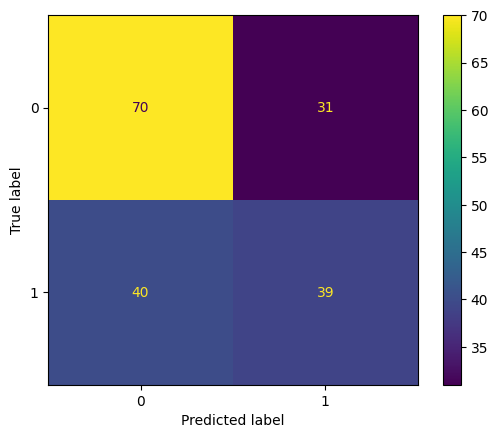

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators' : [100, 200, 300, 400, 500],
    'randomforestclassifier__max_features' : ['log2', 'sqrt', 50],
    'randomforestclassifier__oob_score'    : [True, False],
    'randomforestclassifier__class_weight' : ['balanced', 'balanced_subsample', None],
    'randomforestclassifier__min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9],
}

model = GridSearchCV(
    pipe, 
    param_grid, 
    scoring = 'accuracy', 
    n_jobs=-1, verbose = 5)
model.fit(X, y)

/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mamiglia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/mamiglia/.local/lib/python3.10/site-pack

In [ ]:
res = pd.DataFrame(model.cv_results_)

import seaborn as sns

for param in param_grid.keys():
    sns.boxplot(res, x = 'mean_test_score', y = param)